# Schwachstellen erkennen

## Zielsetzung
1. Festlegen der Zielgrößen ...
- Liefertreue
- Auslastung
2. Optimieren der Zielgrößen ..

In [11]:
from projects.data_detectives.code.functions import *
from datetime import datetime
from pathlib import Path

## Parameter variieren

In [12]:
start_time_simulation = datetime(year=2025, month=11, day=6, hour=7)
resource_schedule = "schedule_s1"
work_in_process = 15 # to vary
update_simulation_input_parameters(start_time_simulation=start_time_simulation,
                                   work_in_process=work_in_process)

## Simulieren

In [13]:
!python -m projects.bicycle_world.scenarios.current.main

No module named 'pyarrow'
Project Path: C:\Users\afreiter\PycharmProjects\ofact\projects\bicycle_world
STATUS: Starting Execution
Platform name: Windows
2025-11-05 15:47:10.094230 Execute Simulation
Digital Twin updated
Environment Initialized
correction_needed available
agents from excel
Agents model created
Agents Model Initialized
2025-11-05 15:47:13.508262 Register Agents
Individualize Agents
Time limit: (datetime.datetime(2025, 11, 6, 7, 0), datetime.datetime(2025, 11, 6, 16, 30), 19)
...[agent administration] removing all existing users from the xmpp-server (http://127.0.0.1:9090)
...[agent administration] Create Agents
[Agent Administration] Start agent main_part_agv_nsr_agentfactory_agents 

[main_part_agv_nsr_agentfactory_agents] Hello World! I'm agent main_part_agv_nsr_agentfactory_agents@127.0.0.1 
 TransportAgent 

[Agent Administration] Start agent individual_part_agv_nsr_agentfactory_agents 

[individual_part_agv_nsr_agentfactory_agents] Hello World! I'm agent individual_

C:\Users\afreiter\PycharmProjects\ofact\ofact\twin\change_handler\Observer.py:135: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.utilisation_df = pd.concat([


# Analysieren

Platform name: Windows
AnalyticsDataBase instantiation finished


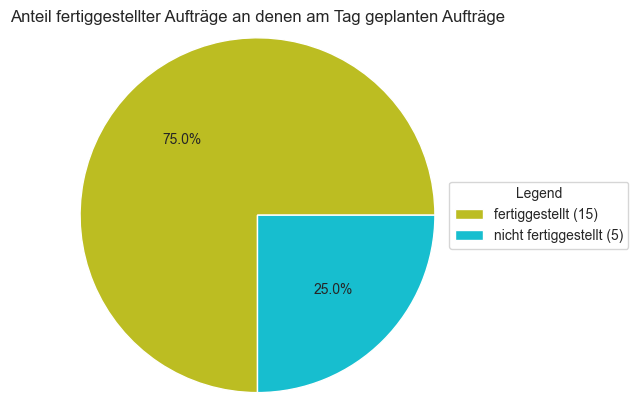

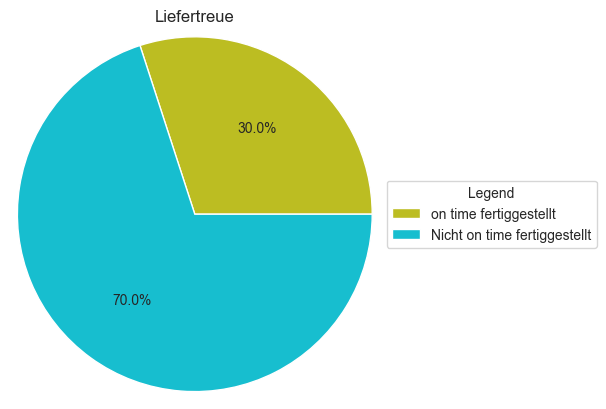

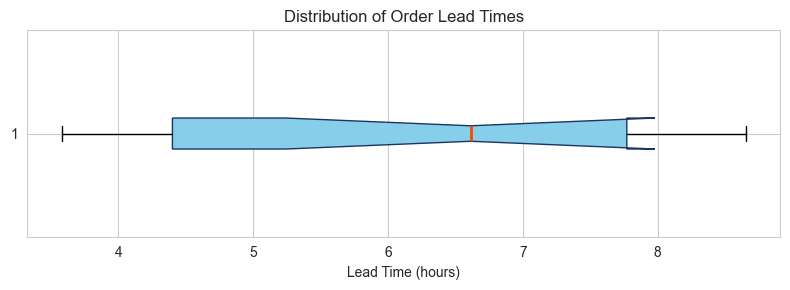

In [14]:
# simuliertes Szenario einladen
# resource_schedule = "schedule_s1"
# work_in_process = 5
scenario = f"{resource_schedule}_{int(work_in_process)}"

state_model_file_path = Path(PROJECT_PATH + f"/scenarios/current/results/{scenario}.pkl")
state_model: StateModel = deserialize_state_model(state_model_file_path, persistence_format="pkl", dynamics=True)

schedule = get_schedule(state_model)

# Overall KPIs
get_order_finished(state_model)  # share of orders finished
get_delivery_reliability(state_model)  # delivery reliability
get_order_lead_time(state_model)  # order lead time
actual_resources_working_hours, planned_resources_working_hours = (
    get_schedule_time_equivalent(schedule=schedule,
                                 aggregated=["Main Part AGV"]))  # capacity utilization

# Detailed view
schedule = plot_resource_schedule(schedule)

In [10]:
import pandas as pd
orders_data = []
for order in state_model.get_orders():
    orders_data.append({
        'Order': order.identification,
        'Release Date': order.release_date_actual,
        'Delivery Date Planned': order.delivery_date_planned,
        'Delivery Date Actual': order.delivery_date_actual,
        'Lead Time': (order.delivery_date_actual - order.release_date_actual)
                          if (order.delivery_date_actual and order.release_date_actual)
                          else None,
        'Lateness': (order.delivery_date_actual - order.delivery_date_planned)
                          if (order.delivery_date_actual and order.delivery_date_planned)
                          else None
    })

df = pd.DataFrame(orders_data)
df

,Order,Release Date,Delivery Date Planned,Delivery Date Actual,Lead Time,Lateness
0,22650,2025-11-06 07:00:00,2025-11-06 10:00:00,2025-11-06 11:35:48,0 days 04:35:48,0 days 01:35:48
1,22651,2025-11-06 07:00:00,2025-11-06 10:00:00,2025-11-06 11:08:14,0 days 04:08:14,0 days 01:08:14
2,22652,2025-11-06 07:00:44,2025-11-06 12:00:00,2025-11-06 12:01:32,0 days 05:00:48,0 days 00:01:32
3,22653,2025-11-06 07:00:42,2025-11-06 12:00:00,2025-11-06 15:09:09,0 days 08:08:27,0 days 03:09:09
4,22654,2025-11-06 07:01:26,2025-11-06 12:00:00,2025-11-06 14:15:56,0 days 07:14:30,0 days 02:15:56
5,22655,2025-11-06 07:00:44,2025-11-06 12:00:00,2025-11-06 11:54:24,0 days 04:53:40,-1 days +23:54:24
6,22656,2025-11-06 07:00:42,2025-11-06 12:00:00,2025-11-06 13:07:26,0 days 06:06:44,0 days 01:07:26
7,22657,2025-11-06 07:01:26,2025-11-06 12:00:00,2025-11-06 14:06:55,0 days 07:05:29,0 days 02:06:55
8,22658,2025-11-06 07:01:32,2025-11-06 14:00:00,NaT,NaT,NaT
9,22659,2025-11-06 07:01:28,2025-11-06 14:00:00,2025-11-06 14:52:32,0 days 07:51:04,0 days 00:52:32
